# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Meytal 0534
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, KBinsDiscretizer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

from sklearn.model_selection import train_test_split


import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [3]:
train = pd.read_csv('housing_train.csv')
test = pd.read_csv('housing_test.csv')
train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


In [4]:
test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


In [5]:
train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


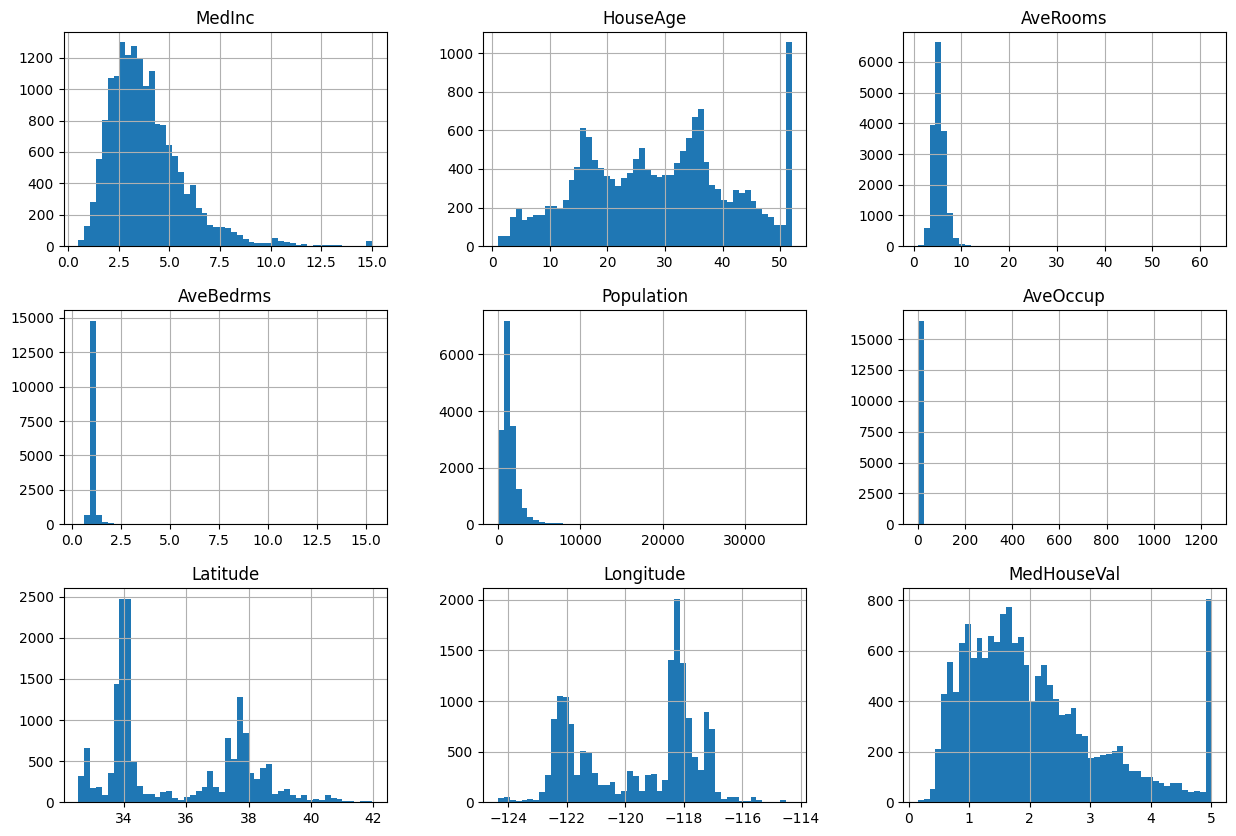

In [6]:
train.hist(bins=50, figsize=(15,10))
plt.show()

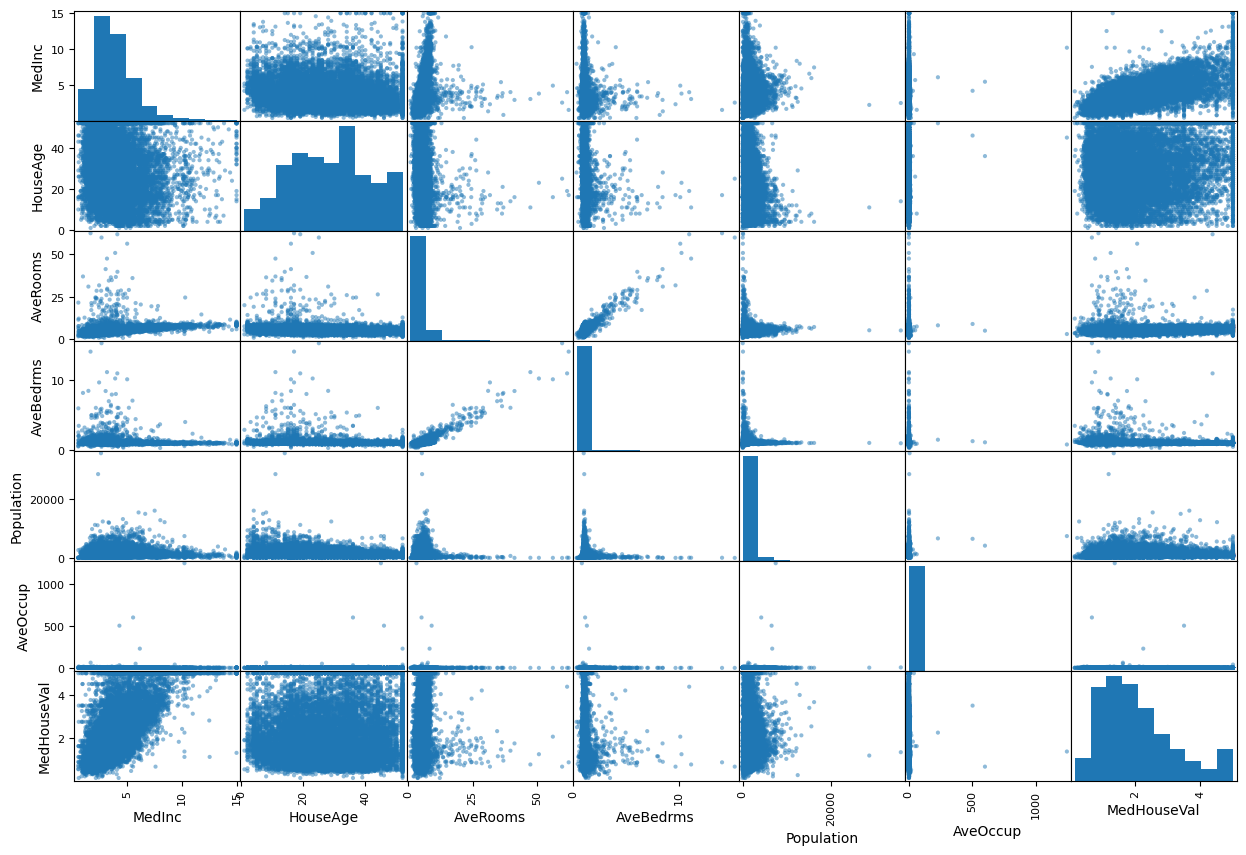

In [7]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
scatter_matrix(train[attributes], figsize = (15, 10))
plt.show()

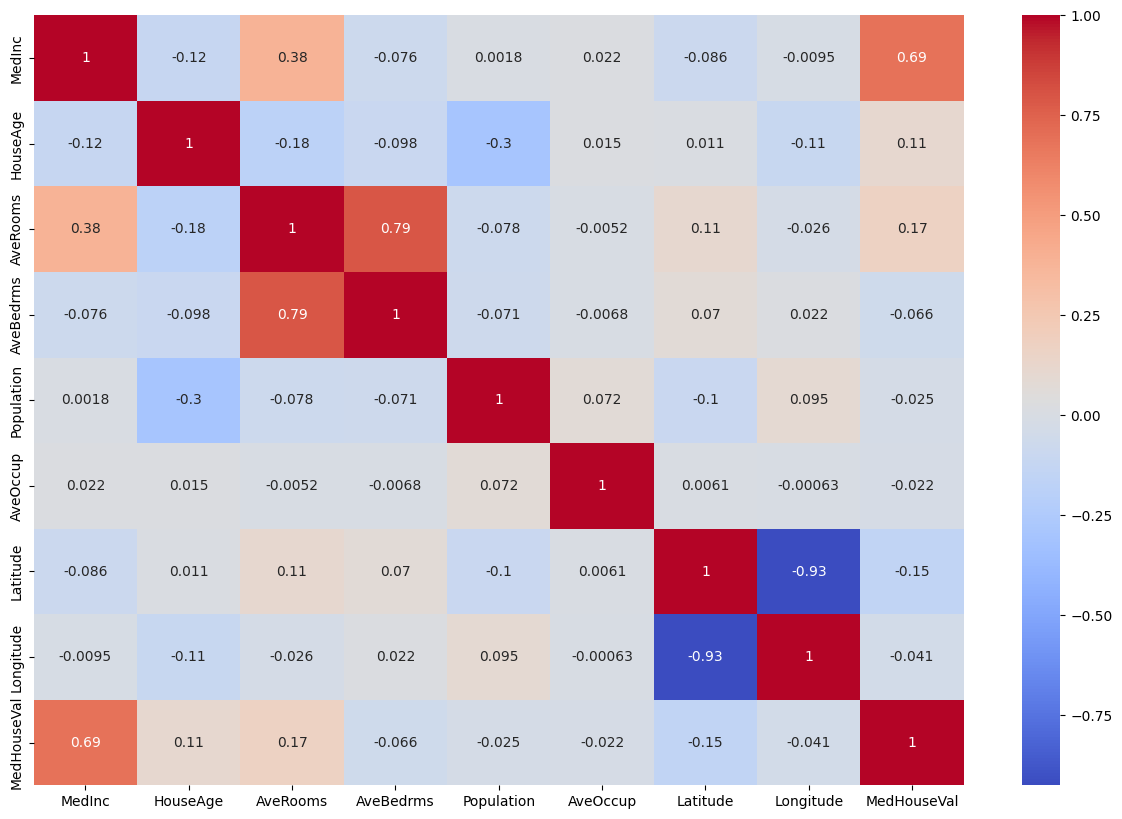

In [8]:
plt.figure(figsize=(15, 10))

correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

Highly correlated features to remove: {3}
Evaluating LinearRegression with Polynomial features
Evaluating DecisionTree with Original features
Evaluating RandomForest with Original features


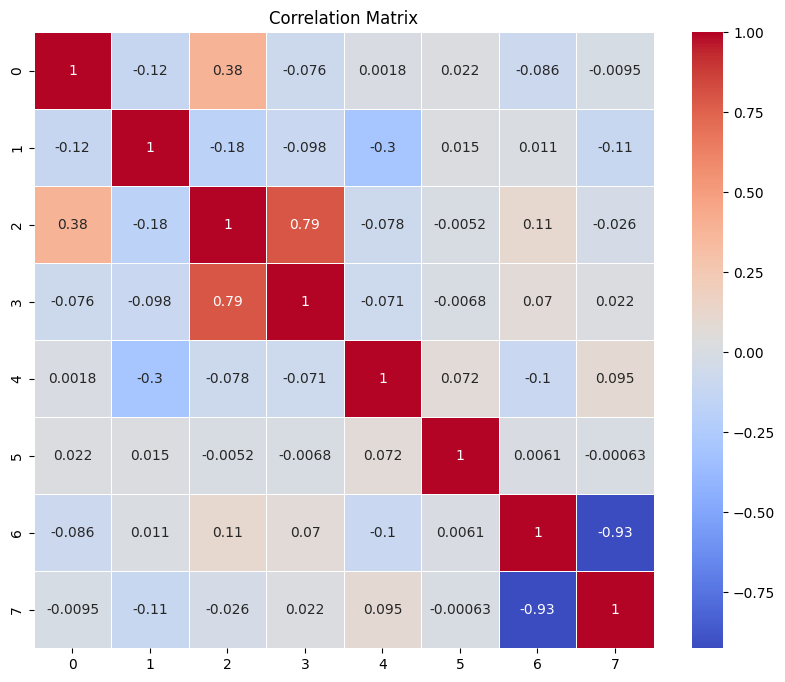

In [9]:
# Splitting the dataset
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Outliers Detection and Removal
def remove_outliers(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

X_train_no_outliers = remove_outliers(pd.DataFrame(X_train_scaled))

# Correlation Matrix for Feature Selection
plt.figure(figsize=(10, 8))
corr_matrix = pd.DataFrame(X_train_scaled).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
# plt.show()

# Identifying highly correlated features
correlated_features = set()
correlation_threshold1 = 0.7
correlation_threshold2 = 0.9

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold1 and abs(corr_matrix.iloc[i, j]) < correlation_threshold2:
            correlated_features.add(corr_matrix.columns[i])
print(f"Highly correlated features to remove: {correlated_features}")

# Drop correlated features
X_train_dropped = pd.DataFrame(X_train_scaled).drop(columns=correlated_features)
X_test_dropped = pd.DataFrame(X_test_scaled).drop(columns=correlated_features)

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define scoring metric for regression (R²)
scoring = make_scorer(r2_score)

# Models and their hyperparameters
models_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]  # Whether to calculate the intercept for the model
        },
        'features': ['Polynomial']  # Polynomial features are beneficial for linear models
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [10, 12, 14, 16, 18, 23],  # Maximum depth of the tree
            'min_samples_split': [75, 80, 83, 85, 90, 93],  # Minimum number of samples required to split a node
            'min_samples_leaf': [4, 6, 10]  # Minimum number of samples required to be at a leaf node
        },
        'features': ['Original']  # Original features work best with trees
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [40, 60, 100],  # Number of trees in the forest
            'max_depth': [40, 50, 60],  # Maximum depth of the tree
        },
        'features': ['Original']  # RandomForest benefits from original features
    }
}

# Prepare feature sets to test
features_sets = {
    'Original': (X_train_scaled, X_test_scaled),
    'Polynomial': (X_train_poly, X_test_poly),
}

# Results storage
results = []

# Grid search for each model and feature set
for model_name, model_params in models_params.items():
    for feature_set_name in model_params['features']:
        X_train_fs, X_test_fs = features_sets[feature_set_name]
        
        print(f"Evaluating {model_name} with {feature_set_name} features")

        grid_search = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring=scoring, return_train_score=True)
        grid_search.fit(X_train_fs, y_train)

        # Collect results
        for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
            results.append({
                'Feature Set': feature_set_name,
                'Model': model_name,
                'Parameters': params,
                'Mean CV Score': mean_score,
                'Train Score': grid_search.score(X_train_fs, y_train),
                'Test R^2 Score': r2_score(y_test, grid_search.best_estimator_.predict(X_test_fs))
            })

# Display the results in a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df[['Feature Set', 'Model', 'Parameters', 'Mean CV Score', 'Train Score', 'Test R^2 Score']]
results_df.sort_values(by='Mean CV Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

In [10]:
results_df

,Feature Set,Model,Parameters,Mean CV Score,Train Score,Test R^2 Score
0,Original,RandomForest,"{'max_depth': 60, 'n_estimators': 100}",0.798546,0.973063,0.827169
1,Original,RandomForest,"{'max_depth': 40, 'n_estimators': 100}",0.798456,0.973063,0.827169
2,Original,RandomForest,"{'max_depth': 50, 'n_estimators': 100}",0.797940,0.973063,0.827169
3,Original,RandomForest,"{'max_depth': 50, 'n_estimators': 40}",0.796565,0.973063,0.827169
4,Original,RandomForest,"{'max_depth': 50, 'n_estimators': 60}",0.796510,0.973063,0.827169
...,...,...,...,...,...,...
114,Original,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.693001,0.791009,0.736992
115,Original,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.692241,0.791009,0.736992
116,Original,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.691413,0.791009,0.736992
117,Polynomial,LinearRegression,{'fit_intercept': True},0.460712,0.679785,0.658713


In [11]:
best_combination = results_df.iloc[0]
best_combination

Feature Set                                     Original
Model                                       RandomForest
Parameters        {'max_depth': 60, 'n_estimators': 100}
Mean CV Score                                   0.798546
Train Score                                     0.973063
Test R^2 Score                                  0.827169
Name: 0, dtype: object

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [12]:
# Choosing the most successful combination
best_combination = results_df.iloc[0]
print(best_combination)
# Details of the most successful combination
best_feature_set = best_combination['Feature Set']
best_model_name = best_combination['Model']
best_params = best_combination['Parameters']

# Preparation of the data according to the most successful combination
# Starting from the original data
X_train_final = X_train_scaled
X_test_final = X_test_scaled

# combinations of feature sets according to the selected combination
if 'Polynomial' in best_feature_set:
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_final = poly.fit_transform(X_train_scaled)
    X_test_final = poly.transform(X_test_scaled)
elif 'Original' not in best_feature_set:
    raise ValueError(f"Unknown feature set: {best_feature_set}")

# Creating the model with the optimal hyperparameters
model_classes = {
    'LinearRegression': LinearRegression,
    'DecisionTree': DecisionTreeRegressor,
    'RandomForest': RandomForestRegressor
}

# Choosing the appropriate model from the combination
model_class = model_classes.get(best_model_name)
if model_class is None:
    raise ValueError(f"Unknown model: {best_model_name}")

# Creating the model with the hyperparameters found from the Grid Search
model_final = model_class(**best_params)

# Training the model on the training set
model_final.fit(X_train_final, y_train)

# Prediction on the test set
y_pred = model_final.predict(X_test_final)

# Prediction on the test set
final_r2_score = r2_score(y_test, y_pred)
print(f"Final R^2 Score on Test Set: {final_r2_score:.4f}")


Feature Set                                     Original
Model                                       RandomForest
Parameters        {'max_depth': 60, 'n_estimators': 100}
Mean CV Score                                   0.798546
Train Score                                     0.973063
Test R^2 Score                                  0.827169
Name: 0, dtype: object
Final R^2 Score on Test Set: 0.8277


## Part 5 - Apply on test and show model performance estimation

In [14]:
y_test_pred = model_final.predict(X_test_final)

# Shows the first 5 predictions versus the actual results
print("\nFirst 30 Predictions vs Actual Results:")
for i in range(min(5, len(y_test))):
    print(f"Prediction: {y_test_pred[i]:.4f}, Actual: {y_test.values[i]:.4f}")


First 30 Predictions vs Actual Results:
Prediction: 3.3964, Actual: 3.8520
Prediction: 2.3919, Actual: 2.4570
Prediction: 2.8628, Actual: 2.0130
Prediction: 1.1403, Actual: 1.0520
Prediction: 1.2190, Actual: 1.0780
